# Load Dataset

In [70]:
import os
import pandas as pd
import numpy as np

HOUSING_PATH = "../datasets"

def load_housing_data(file):
    csv_path = os.path.join(HOUSING_PATH, file)
    return pd.read_csv(csv_path)

In [71]:
df = load_housing_data("housing_in_london_monthly_variables.csv")
df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


# Explore Dataset

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
date             13549 non-null object
area             13549 non-null object
average_price    13549 non-null int64
code             13549 non-null object
houses_sold      13455 non-null float64
no_of_crimes     7439 non-null float64
borough_flag     13549 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB


In [73]:
df["area"].value_counts()

south east                302
enfield                   302
hackney                   302
tower hamlets             302
hammersmith and fulham    301
hounslow                  301
barking and dagenham      301
west midlands             301
south west                301
haringey                  301
england                   301
inner london              301
ealing                    301
waltham forest            301
kensington and chelsea    301
redbridge                 301
brent                     301
sutton                    301
kingston upon thames      301
hillingdon                301
bexley                    301
lewisham                  301
north west                301
croydon                   301
merton                    301
islington                 301
bromley                   301
newham                    301
harrow                    301
east midlands             301
havering                  301
lambeth                   301
london                    301
barnet    

In [74]:
df.describe()

,average_price,houses_sold,no_of_crimes,borough_flag
count,1.354900e+04,13455.000000,7439.000000,13549.000000
mean,2.635197e+05,3893.994129,2158.352063,0.733338
std,1.876175e+05,12114.402476,902.087742,0.442230
min,4.072200e+04,2.000000,0.000000,0.000000
25%,1.323800e+05,247.000000,1623.000000,0.000000
50%,2.229190e+05,371.000000,2132.000000,1.000000
75%,3.368430e+05,3146.000000,2582.000000,1.000000
max,1.463378e+06,132163.000000,7461.000000,1.000000


# Split train and test datasets

In [75]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [76]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2710 entries, 811 to 9962
Data columns (total 7 columns):
date             2710 non-null object
area             2710 non-null object
average_price    2710 non-null int64
code             2710 non-null object
houses_sold      2692 non-null float64
no_of_crimes     1514 non-null float64
borough_flag     2710 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 169.4+ KB


In [77]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 3652 to 7270
Data columns (total 7 columns):
date             10839 non-null object
area             10839 non-null object
average_price    10839 non-null int64
code             10839 non-null object
houses_sold      10763 non-null float64
no_of_crimes     5925 non-null float64
borough_flag     10839 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 677.4+ KB


# Evaluate fields and their correlations

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe96a750910>,
      dtype=object)

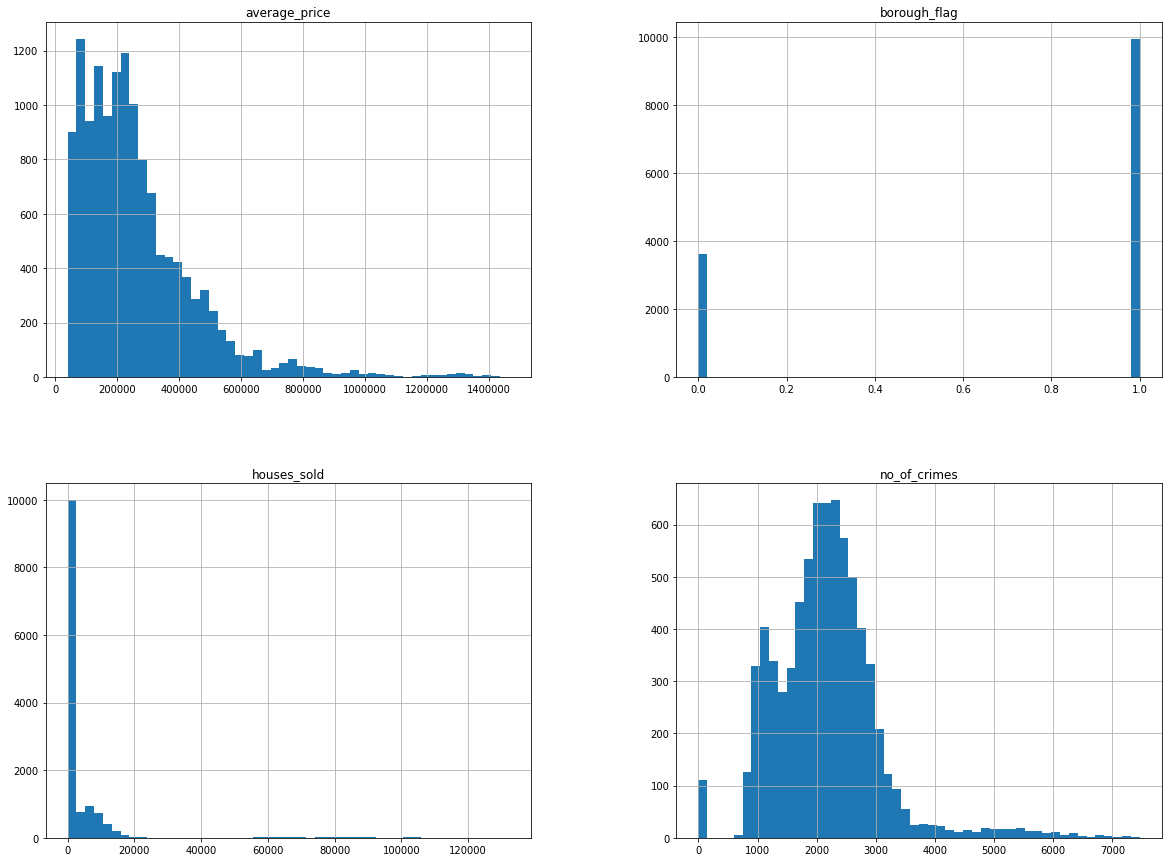

In [78]:
df.hist(bins=50,figsize=(20,15))

In [79]:
## Importante note: No tail heavy histograms in this example.

In [80]:
df.corr()

,average_price,houses_sold,no_of_crimes,borough_flag
average_price,1.000000,-0.168256,0.113835,0.293271
houses_sold,-0.168256,1.000000,0.246839,-0.489623
no_of_crimes,0.113835,0.246839,1.000000,NaN
borough_flag,0.293271,-0.489623,NaN,1.000000


# Create a stratified sample

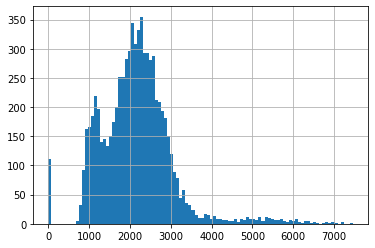

In [88]:
df["no_of_crimes"].hist(bins=100)

In [92]:
df["no_of_crimes"].value_counts()

0.0       104
1956.0     11
2039.0     11
2098.0     10
2276.0     10
         ... 
898.0       1
3874.0      1
2010.0      1
3545.0      1
5450.0      1
Name: no_of_crimes, Length: 2669, dtype: int64

In [94]:
# Replace NaN values by zero
df["no_of_crimes"].dropna(inplace=True)

df["no_of_crimes"].value_counts()

0.0       104
2039.0     11
1956.0     11
2276.0     10
2242.0     10
         ... 
2936.0      1
2993.0      1
5029.0      1
4946.0      1
869.0       1
Name: no_of_crimes, Length: 2669, dtype: int64

In [95]:
df["no_of_crimes"].describe()

count    7439.000000
mean     2158.352063
std       902.087742
min         0.000000
25%      1623.000000
50%      2132.000000
75%      2582.000000
max      7461.000000
Name: no_of_crimes, dtype: float64

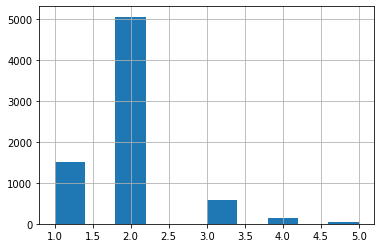

In [97]:
df["crime_cat"] = pd.cut(df["no_of_crimes"],
                           bins=[0, 1500, 3000, 4500, 6000, np.inf],
                           labels=[1, 2, 3, 4, 5])

df["crime_cat"].hist()

In [98]:
df["crime_cat"].value_counts()

2    5061
1    1499
3     583
4     148
5      44
Name: crime_cat, dtype: int64